In [1]:
from flame_utils import ModelFlame, hplot
from flame import Machine
from collections import OrderedDict
import numpy as np

## create `ModelFlame` object from scratch

In [2]:
vec = np.zeros(7)
vec[6] = 1.0
mat = np.zeros([7, 7])
mat[0, 0] = mat[2, 2] = 1.0
mat[1, 1] = mat[3, 3] = 1.0e-6

source = OrderedDict([
    ('name', 'S'),
    ('type', 'source'),
    ('vector_variable', 'BC'),
    ('matrix_variable', 'S')
])

conf = OrderedDict([
    ('sim_type', 'MomentMatrix'),
    ('IonEk', 1e6),
    ('IonEs', 931494320.0),
    ('IonChargeStates', np.array([0.5])),
    ('NCharge', np.array([1.0])),
    ('BC0', vec),
    ('S0', mat),
    ('elements', [source])
])

In [3]:
fm = ModelFlame(machine=Machine(conf))

## insert elements for testing

In [4]:
fm.insert_element(1, {'name':'dr1', 'type': 'drift', 'L': 1.0})
fm.insert_element(2, {'name':'qd1', 'type': 'quadrupole', 'L': 1.0, 'B2':0.5})
fm.insert_element(3, {'name':'dr2', 'type': 'drift', 'L': 1.0})

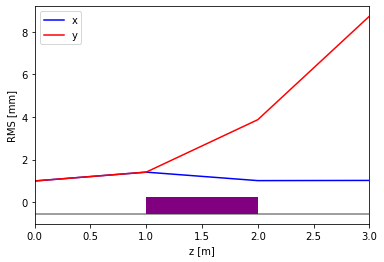

In [5]:
hplot('xrms', 'yrms', machine=fm)